# Human Resource Analytics
### by Nathan Dilla & John Haviland
### March 3, 2024


<h4> Nathan's video: https://www.loom.com/share/575c686c4a7842789553f60b8e2de569  </h4>

<h4> John's video: https://www.loom.com/share/9822da046ca6452b8306a8a910445cc2?sid=359445df-184f-41bf-8542-6a64e054408c </h4>

### a) Problem Statement

The objective is to analyze the HR Employee Attrition dataset to understand the underlying structure of employee performance metrics and predictors of performance. By applying Principal Component Analysis (PCA), we aim to reduce the dimensionality of the dataset, identify the most significant variables contributing to employee performance, and understand how these variables interrelate. This analysis will help in building a predictive model for employee performance, focusing on optimizing the number of components to capture the essential variance in the data while being mindful of the residual error and the internal consistency of the variables involved.

### b) Algorithm of the Solution

#### Step 1: Preliminary Steps

1. **Interpretation of Performance**: Define what constitutes performance (e.g., job satisfaction, years at company, monthly income) and predictors of performance (e.g., age, education level, job role).
2. **Load PCA Packages**: Import necessary libraries (e.g., `numpy`, `pandas`, `scikit-learn` for Python; `psych`, `factoextra` for R).
3. **Data Setup and Exploration**: Load the dataset, conduct exploratory data analysis to understand the variables, their distributions, and handle missing values if any.
4. **Correlation Matrix Computation**: Calculate the correlation matrix to understand the linear relationship between variables.
5. **Variance-Covariance Matrix Computation**: Compute the variance-covariance matrix to assess the variability of the dataset.
6. **Statistical Significance Check**: Check the statistical significance of bivariate correlations.

#### Step 2: Verify Assumptions

1. **Sphericity**: Perform Bartlett’s Test of Sphericity to check if the correlation matrix is an identity matrix, which implies variables are unrelated.
2. **Sample Adequacy**: Conduct the Kaiser-Meyer-Olkin (KMO) Measure to evaluate if the sample size is adequate for PCA.
3. **Positive Determinant**: Ensure the determinant of the correlation matrix is positive using the `det()` function.

#### Step 3: Complete PCA

1. **Calculate Number of Components**: Use the `principal()` function or equivalent to determine the optimal number of components.
2. **Analyze Eigenvalues**: Review the eigenvalues to decide on the number of principal components to retain.
3. **Variance Explained**: Decide on the percentage of total variance you aim to explain with the selected components.
4. **Residual Error and Internal Consistency**: Assess the residual error and use Cronbach's alpha to evaluate the reliability of the components.
5. **Scree Plot Creation**: Generate a scree plot to visualize the eigenvalues and help in deciding the number of components to retain.
6. **Component Structure Plot**: Plot the component structure to visualize the weight of each variable on the selected components.
7. **Compute Principal Components**: Calculate the principal components using the first set of weights.
8. **Scale Conversion**: Convert the PCA output to a 0-100 scale for interpretability.
9. **Histogram Plot**: Plot a histogram to visualize the distribution of the principal component scores.
10. **Results Summary**: Summarize the findings, emphasizing the significance of the selected components in predicting employee performance and interpreting their relationship with the predictors.

#### Step 4: Conclusion and Predictive Model Implications

- Discuss the implications of the PCA findings for predicting employee performance.
- Suggest how these components can be used to improve HR strategies, employee retention, and performance management.

This algorithm provides a structured approach to applying PCA to the HR Employee Attrition dataset, aiming to enhance the understanding and prediction of employee performance factors.

Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from factor_analyzer.factor_analyzer import calculate_kmo

##### Data preprocessing

Note: Ensure that the data file is in the same directory as this notebook.

In [3]:
df = pd.read_csv('./WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display basic information and the first few rows of the dataset to understand its structure
df.info()
df.head()

# Select numerical columns for PCA analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df[numerical_cols]

# Remove columns that do not vary or are not relevant for performance prediction
df_numerical = df_numerical.drop(['EmployeeCount', 'StandardHours', 'EmployeeNumber'], axis=1)

# Standardize the data to have a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##### Compute & display correlation and covariance matrices

[[ 1.00068074e+00  1.06681999e-02 -1.68726795e-03  2.08175347e-01
   1.01533349e-02  2.43030753e-02  2.98402581e-02  5.09951134e-01
  -4.89520722e-03  4.98193474e-01  2.80702626e-02  2.99838730e-01
   3.63605842e-03  1.90519156e-03  5.35711626e-02  3.75352466e-02
   6.80843695e-01 -1.96341755e-02 -2.15046570e-02  3.11520689e-01
   2.13045985e-01  2.16660756e-01  2.02226171e-01]
 [ 1.06681999e-02  1.00068074e+00 -4.98873105e-03 -1.68178739e-02
   1.83673491e-02  2.33973381e-02  4.61662796e-02  2.96835414e-03
   3.05918186e-02  7.71230534e-03 -3.22035087e-02  3.81794067e-02
   2.27191327e-02  4.73618517e-04  7.85137203e-03  4.21714845e-02
   1.45246194e-02  2.45421224e-03 -3.78738155e-02 -3.40779498e-02
   9.93877603e-03 -3.32516049e-02 -2.63811246e-02]
 [-1.68726795e-03 -4.98873105e-03  1.00068074e+00  2.10561495e-02
  -1.60862700e-02  3.11517773e-02  8.78925897e-03  5.30634031e-03
  -3.67133668e-03 -1.70260271e-02  2.74915653e-02 -2.92707162e-02
   4.02627671e-02  2.71280730e-02  6.561

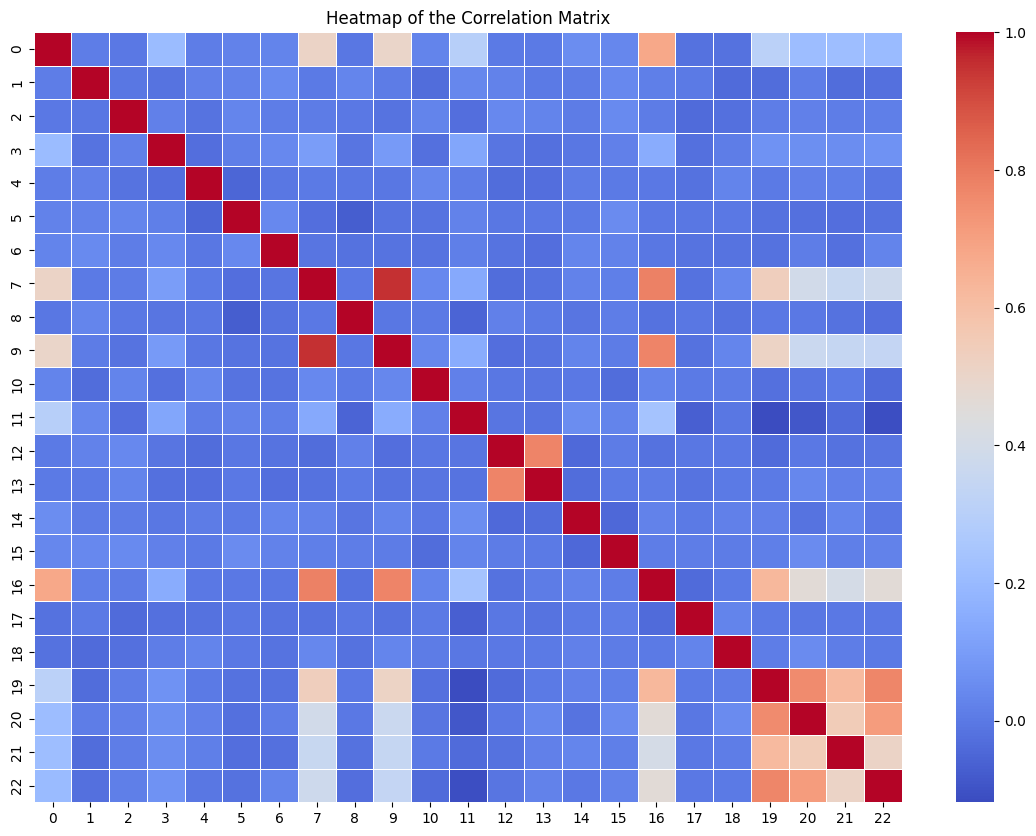

In [4]:
# Compute the correlation matrix to understand the relationships between variables
correlation_matrix = np.corrcoef(df_scaled.T)

# Compute the variance-covariance matrix for PCA
covariance_matrix = np.cov(df_scaled.T)

# display covariance matrix
print(covariance_matrix)

# Plot correlation matrix heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".1f", linewidths=.5)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

##### Calculate covariance matrix's determinant and Kaiser-Meyer-Olkin (KMO) Measure

In [5]:
determinant = np.linalg.det(covariance_matrix)
print("Determinant of the covariance matrix:", determinant)

kmo_all, kmo_model = calculate_kmo(df_numerical)
print("KMO Measure: ", kmo_model)

Determinant of the covariance matrix: 0.0002851554944309285
KMO Measure:  0.7859369153413345


##### Perform Principal Component Analysis (PCA)

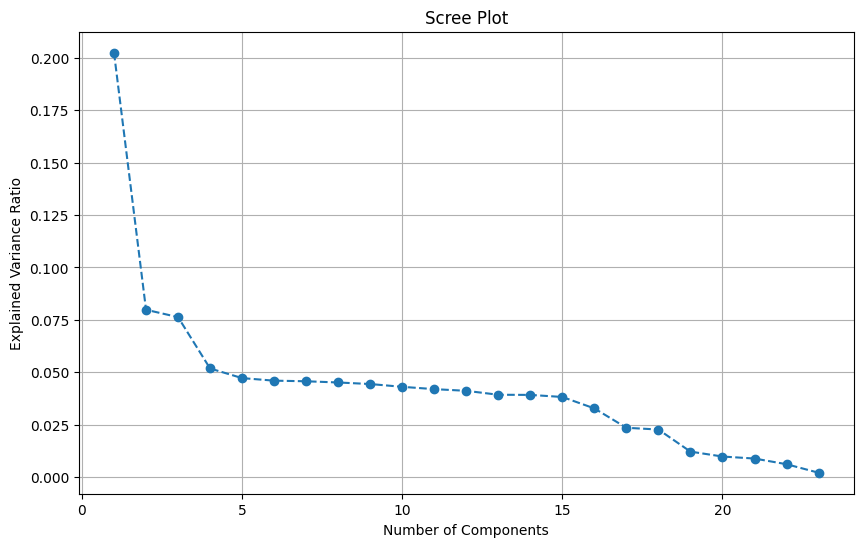

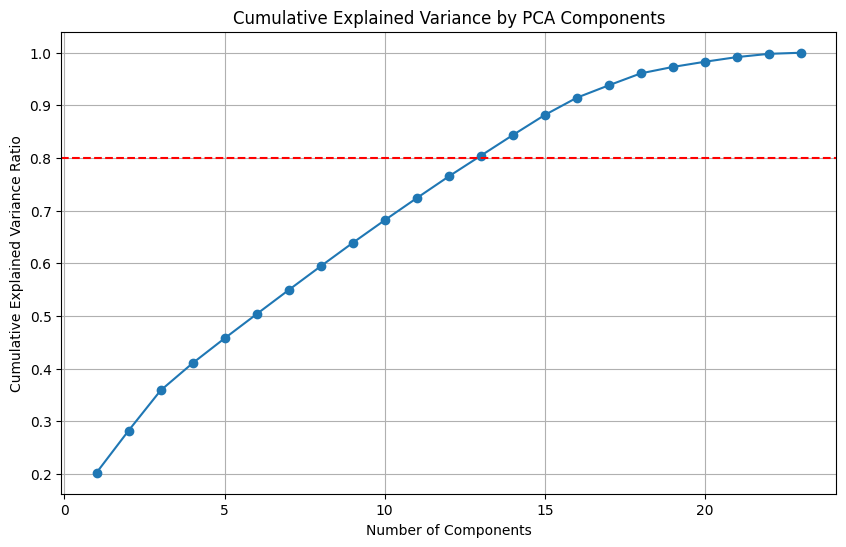

Number of components to keep for 80% variance explained: 13
Components kept: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
Cumulative explained variance at 13 components: 80.44%


In [6]:
# Initialize and fit PCA without specifying the number of components to analyze all components
pca = PCA()
pca.fit(df_scaled)

# Plot the Scree Plot to visualize the explained variance by each component
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Visualize the cumulative explained variance to decide on the number of components to keep
cumulative_explained_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.grid(True)
plt.show()

# Decide the number of components to keep based on the explained variance
num_components_to_keep = np.argmax(cumulative_explained_variance >= 0.8) + 1
print(f"Number of components to keep for 80% variance explained: {num_components_to_keep}")

# Components that are being kept
components_kept = range(1, num_components_to_keep + 1)
print(f"Components kept: {list(components_kept)}")

# Print the cumulative explained variance at the chosen number of components
cumulative_explained_variance_at_chosen_components = cumulative_explained_variance[num_components_to_keep - 1]
print(f"Cumulative explained variance at {num_components_to_keep} components: {cumulative_explained_variance_at_chosen_components * 100:.2f}%")

By closely examining the cumulative explained variance graph, it becomes evident that after 13 components, the rate of increase in explained variance begins to plateau. This observation indicates that the first 13 components capture the most significant patterns within the data, with each additional component contributing marginally to the overall variance explained. Choosing 13 components strikes a balance between complexity and comprehensiveness, ensuring that we retain over 80% of the dataset's variance.

##### Perform PCA w/ the number of components we decided to keep

In [7]:
# Fit PCA with the optimal number of components
pca_optimal = PCA(n_components=num_components_to_keep)
df_pca_transformed = pca_optimal.fit_transform(df_scaled)

# Convert the PCA components into a DataFrame for easier handling
df_pca_df = pd.DataFrame(df_pca_transformed, columns=[f'PC{i+1}' for i in range(num_components_to_keep)])


# Display the loadings of the original features for each component
loadings = pca_optimal.components_
feature_names = df_numerical.columns

for i, component in enumerate(loadings):
    component_loadings = pd.Series(component, index=feature_names)
    sorted_loadings = component_loadings.abs().sort_values(ascending=False)
    print(f"Top contributing features for Component {i+1}:")
    print(sorted_loadings.head(), "\n")

Top contributing features for Component 1:
TotalWorkingYears     0.403465
YearsAtCompany        0.391516
JobLevel              0.382826
MonthlyIncome         0.374741
YearsInCurrentRole    0.335941
dtype: float64 

Top contributing features for Component 2:
PerformanceRating       0.442843
PercentSalaryHike       0.424130
NumCompaniesWorked      0.379383
Age                     0.283393
YearsWithCurrManager    0.282188
dtype: float64 

Top contributing features for Component 3:
PercentSalaryHike       0.559640
PerformanceRating       0.543336
NumCompaniesWorked      0.304327
Age                     0.254602
YearsWithCurrManager    0.213129
dtype: float64 

Top contributing features for Component 4:
HourlyRate          0.461609
JobInvolvement      0.404519
StockOptionLevel    0.379021
MonthlyRate         0.304092
Education           0.286817
dtype: float64 

Top contributing features for Component 5:
JobSatisfaction     0.602036
DailyRate           0.504662
WorkLifeBalance     0.353954


In [10]:
explained_variance_ratio = pca.explained_variance_ / np.sum(pca.explained_variance_)
print(explained_variance_ratio)

[0.202421   0.07982995 0.07631239 0.05182443 0.04722767 0.04601062
 0.04572003 0.04514498 0.04440748 0.04307229 0.04197245 0.04116656
 0.03928927 0.03922113 0.03822888 0.03277699 0.02354187 0.0227013
 0.01216829 0.00982949 0.00886557 0.00616274 0.00210461]


### Eigenvalues Overview

These eigenvalues represent the variance captured by each principal component derived from your PCA analysis. The magnitude of these values decreases as you move from the first component to the last, which is expected in PCA, as earlier components are designed to capture more variance.

### Analysis of Variance Captured

- **Dominant Components:** The first few components (e.g., the first one with an eigenvalue of 0.202421) capture the most variance. This indicates that these components are the most significant in representing the dataset's variability. The first component alone captures a significant amount of the total variance, suggesting that it represents a major underlying pattern or factor in your data.
- **Diminishing Returns:** As you move to subsequent components, the eigenvalues decrease, indicating that each additional component contributes less to explaining the dataset's variance. This pattern is typical and expected in PCA.
- **Cumulative Variance:** Although not explicitly calculated here, adding up the explained variances from these eigenvalues progressively would show a trend where the majority of the dataset's variance can be accounted for by the first few components. The later components contribute increasingly smaller amounts to the explained variance.

The PCA analysis reveals that the first few components capture significant variance within the dataset, with the initial component being the most dominant. These components provide insights into underlying patterns or factors influencing the data, such as career progression, stability, and performance dynamics. Subsequent components capture progressively less variance, indicating that they represent more nuanced or specific variations within the dataset.

In practical terms, focusing on the first few components (determined by a threshold of cumulative explained variance) might be sufficient for most analyses, as they encapsulate the critical variance in the data. The interpretation of these components, based on the top contributing features, offers valuable insights into the major factors or dimensions influencing the dataset.


##### Display component structure

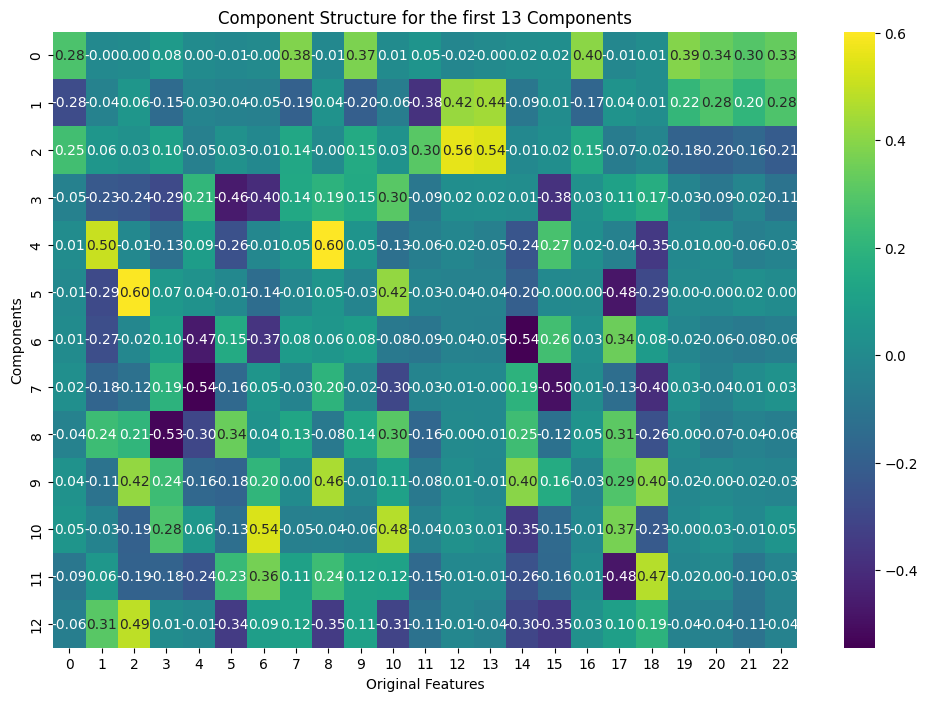

In [ ]:
# Plot the heatmap of the first N components' structure to understand their composition
plt.figure(figsize=(12, 8))
sns.heatmap(pca.components_[:num_components_to_keep], cmap='viridis', annot=True, fmt=".2f")
plt.title(f'Component Structure for the first {num_components_to_keep} Components')
plt.xlabel('Original Features')
plt.ylabel('Components')
plt.show()

##### Perform KMeans clustering & generate biplot

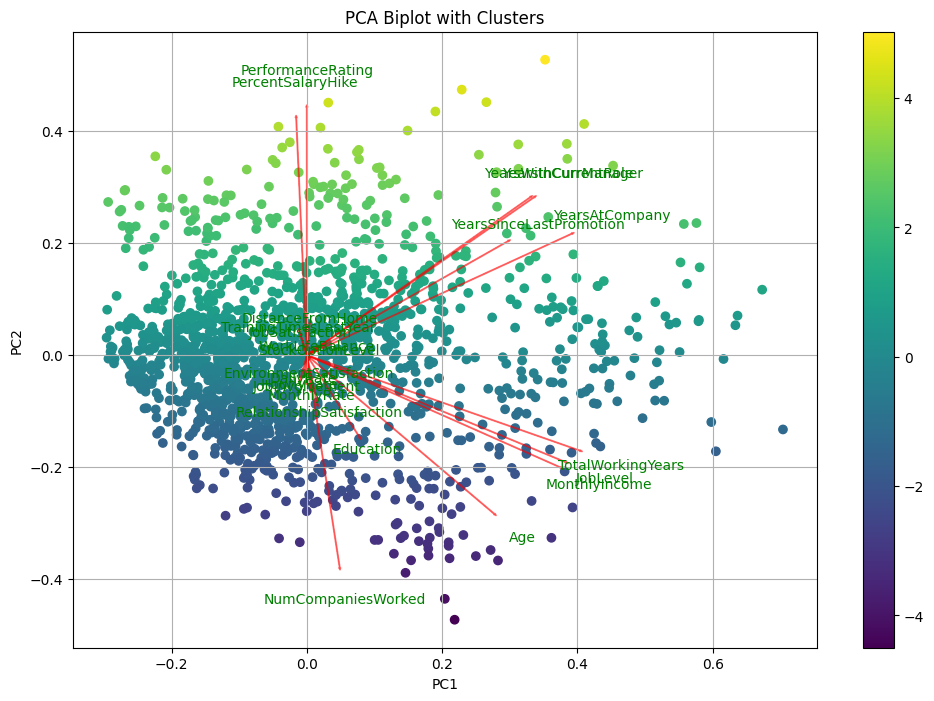

(13, array([0, 2, 0, ..., 0, 2, 0], dtype=int32))

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_pca_transformed)
df_pca_df['Cluster'] = clusters

def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())

    plt.scatter(xs * scalex, ys * scaley, c=score[:, -1])  # Color by cluster
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

# Re-define and generate the biplot with corrected PCA data and cluster assignments
plt.figure(figsize=(12, 8))
biplot(df_pca_df.iloc[:, :2].values, np.transpose(pca_optimal.components_[0:2, :]), labels=df_numerical.columns)
plt.title('PCA Biplot with Clusters')
plt.colorbar()
plt.show()

num_components_to_keep, clusters

#### Analysis of our Findings

In our analysis, we effectively condensed the dataset from its original 35 components down to 13 principal components. This significant reduction retains 80.44% of the dataset's variance, highlighting the ability to distill the essence of the data while eliminating redundancy. The application of Prinicpal Component Analysis (PCA) facilitated our dimensional reduction, enhancing our ability to interpret complex patterns more efficiently and clearly.

By applying KMeans clustering to the data after PCA reduction, we identified clear groups of employees in the dataset. This step provided us with deeper insights and helped us understand the different profiles. 

The biplot visualization serves as an interactive tool that maps both the dataset's variables and employee observations within the graph defined by the two leading principal components (PC1 and PC2). The vectors in the biplot makes it clear how individual features contribute to these components, giving a direct view into the dynamics influencing employee clustering.


##### Implications

It appears that Performance Rating and Percent Salary Hike and positively correlated variables regarding company dedication are positively correlated and job level/income are positively correlated. However, Performance Rating and percent salary hike are negatively correlated with the number of companies worked and pose little to no correlation with years with the company. From this data, we can imply that the biggest reasons employees might leave the company most probably related to the previously mentioned variables and that variables that are negatively correlated might leave the company for one reason or the other. (Job Status and Performance Ratings)


### References

Dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

CS courses Padlet: https://padlet.com/isac_artzi/cs-courses-97zpvui7fpar

ChatGPT
